In [1]:
seed = 42  # for reproducibility

import pickle
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False
%matplotlib inline

import os
import sys
from pathlib import Path
import torch
import torch.nn.functional as F
from torchvision.utils import make_grid, save_image
from sklearn.metrics import plot_confusion_matrix
torch.manual_seed(seed)
sys.path.append(str(Path().absolute().parent))
plt.style.use('seaborn')

In [2]:
exp_path = Path().absolute().parent.parent.joinpath('src/experiments/0046_2centersInbrCMMD_1epr30fr_BALANCED_ResNet18_Isolated')
clog_path = 'experiments/0047_2centersInbrCMMD_1epr30fr_BALANCED_ResNet18_IsolatedClient_Logs'
# stge_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/stge')
# jarv_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/jarv')
# bcdr_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/bcdr')
inbreast_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/inbreast')
cmmd_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/cmmd')

In [3]:
pickle_file = 'log.pkl'
with open(exp_path.joinpath(pickle_file), 'rb') as handle:
    aggregated_metrics = pickle.load(handle)
    
# with open(stge_path.joinpath(pickle_file), 'rb') as handle:
#     stge_metrics = pickle.load(handle)
# with open(jarv_path.joinpath(pickle_file), 'rb') as handle:
#     jarv_metrics = pickle.load(handle)
    
with open(inbreast_path.joinpath(pickle_file), 'rb') as handle:
    inbreast_metrics = pickle.load(handle)
    
# with open(bcdr_path.joinpath(pickle_file), 'rb') as handle:
#     bcdr_metrics = pickle.load(handle)
    
with open(cmmd_path.joinpath(pickle_file), 'rb') as handle:
    cmmd_metrics = pickle.load(handle)

In [4]:
cmmd_metrics.keys()

dict_keys(['local_loss', 'GMLD_val_loss', 'LMLD_val_loss', 'local_accuracy', 'local_sensitivity', 'local_specificity', 'local_val_predictions', 'GMLD_accuracy', 'GMLD_true_positives', 'GMLD_false_positives', 'GMLD_false_negatives', 'GMLD_true_negatives', 'LMLD_train_accuracy', 'LMLD_val_accuracy', 'LMLD_train_true_positives', 'LMLD_train_false_positives', 'LMLD_train_false_negatives', 'LMLD_train_true_negatives', 'LMLD_val_true_positives', 'LMLD_val_false_positives', 'LMLD_val_false_negatives', 'LMLD_val_true_negatives'])

# Accuracies, 5 folds, 100 epochs. Average so that you get 1,100 np array (averaged across folds)

In [5]:
aggregated_metrics.keys()

dict_keys(['accuracies_aggregated', 'total_val_loss', 'time_spent'])

In [6]:
aggregated_metrics['accuracies_aggregated']

[0.6539414414414414]

In [7]:
inbreast_metrics['local_loss']

{0: [0.6661277413368225,
  0.4664154052734375,
  0.11198606342077255,
  0.04455409571528435,
  0.050358980894088745,
  0.013090768828988075,
  0.009472675621509552,
  0.00793191883713007,
  0.0067519634030759335,
  0.005880237556993961,
  0.005217908415943384,
  0.004692478571087122,
  0.004251711070537567,
  0.003883112221956253,
  0.0035708067007362843,
  0.0033081267029047012,
  0.0030706797260791063,
  0.002867539180442691,
  0.0026881867088377476,
  0.002531552454456687,
  0.0023903341498225927,
  0.0022639750968664885,
  0.0021466591861099005,
  0.002040307968854904,
  0.0019423483172431588,
  0.001856164657510817,
  0.0017748739337548614,
  0.001701967790722847,
  0.001633795560337603,
  0.0015683140372857451],
 1: []}

In [8]:
cmmd_metrics['local_loss']

{0: [0.8834518194198608,
  0.8814972639083862,
  1.1955839395523071,
  1.6626560688018799,
  3.185943603515625,
  1.8240549564361572,
  2.432920455932617,
  1.7969952821731567,
  1.561079978942871,
  1.1787196397781372,
  1.3871946334838867,
  0.9180243611335754,
  0.5996321439743042,
  0.9056997299194336,
  1.2787902355194092,
  0.07423926144838333,
  0.08820119500160217,
  0.04875108599662781,
  0.06066124886274338,
  0.0587371401488781,
  0.029505088925361633,
  0.021839123219251633,
  0.02029847353696823,
  0.01880466192960739,
  0.01748029515147209,
  0.016322486102581024,
  0.015291841700673103,
  0.014394016936421394,
  0.013597909361124039,
  0.012901542708277702],
 1: []}

In [9]:
cmmd_metrics['LMLD_val_accuracy']

[0.8828828828828829]

## Curve

In [10]:
cmmd_losses_local = np.array([cmmd_metrics['local_loss'][0][i] for i in range(len(cmmd_metrics['local_loss'][0])-1)])
inbreast_losses_local = np.array([inbreast_metrics['local_loss'][0][i] for i in range(len(inbreast_metrics['local_loss'][0])-1)])
# stge_losses_local = np.array([stge_metrics['local_loss'][i][0] for i in range(len(stge_metrics['local_loss'])-1)])
# jarv_losses_local = np.array([jarv_metrics['local_loss'][i][0] for i in range(len(jarv_metrics['local_loss'])-1)])
# bcdr_losses_local = np.array([bcdr_metrics['local_loss'][i][0] for i in range(len(bcdr_metrics['local_loss'])-1)])
steps = range(len(cmmd_losses_local))

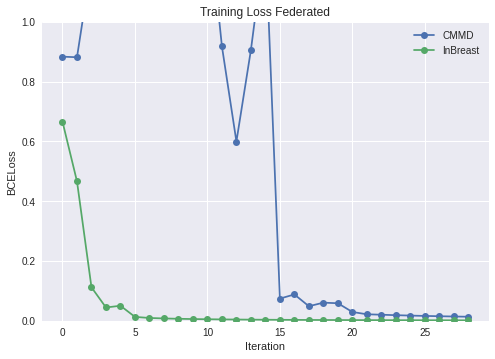

In [11]:
plt.plot(steps, cmmd_losses_local,'-o', label='CMMD')
plt.plot(steps, inbreast_losses_local,'-o', label='InBreast')
# plt.plot(steps, bcdr_losses_local,'-o', label='BCDR')
# plt.plot(steps, jarv_losses_local,'-o', label='OPTIMAM (jarv)')
# plt.plot(steps, stge_losses_local,'-o', label='OPTIMAM (stge)')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Training Loss Federated')
plt.savefig('./plots/train_loss_per_center_30EPR1FR_2centers_isolated.png')

In [24]:
cmmd_metrics['LMLD_val_loss']

{0: [0.17207342386245728], 1: []}

In [13]:
inbreast_metrics['GMLD_val_loss'][0]

2.494941085577011

In [26]:
# cmmd_losses_local = np.array([cmmd_metrics['LMLD_val_loss'][0][i] for i in range(len(cmmd_metrics['LMLD_val_loss'][0])-1)])
# inbreast_losses_local = np.array([inbreast_metrics['LMLD_val_loss'][0][i] for i in range(len(inbreast_metrics['LMLD_val_loss'][0])-1)])
# # stge_losses_local = np.array([stge_metrics['local_val_loss'][i] for i in range(len(stge_metrics['local_val_loss'])-1)])
# # jarv_losses_local = np.array([jarv_metrics['local_val_loss'][i] for i in range(len(jarv_metrics['local_val_loss'])-1)])
# # bcdr_losses_local = np.array([bcdr_metrics['local_val_loss'][i] for i in range(len(bcdr_metrics['local_val_loss'])-1)])
# steps = range(len(cmmd_losses_local))

In [25]:
# plt.plot(steps, cmmd_losses_local,'-o', label='CMMD')
# plt.plot(steps, inbreast_losses_local,'-o', label='InBreast')
# # plt.plot(steps, bcdr_losses_local,'-o', label='BCDR')
# # plt.plot(steps, jarv_losses_local,'-o', label='OPTIMAM (jarv)')
# # plt.plot(steps, stge_losses_local,'-o', label='OPTIMAM (stge)')
# plt.legend()
# plt.xlabel('Iteration')
# plt.ylim(0,1)
# plt.ylabel('BCELoss')
# plt.title('Validation Loss Federated')
# plt.savefig('./plots/val_loss_per_center_30EPR1FR_2centers_isolated.png')

In [37]:
cmmd_metrics.keys()

dict_keys(['local_loss', 'GMLD_val_loss', 'LMLD_val_loss', 'local_accuracy', 'local_sensitivity', 'local_specificity', 'local_val_predictions', 'GMLD_accuracy', 'GMLD_true_positives', 'GMLD_false_positives', 'GMLD_false_negatives', 'GMLD_true_negatives', 'LMLD_train_accuracy', 'LMLD_val_accuracy', 'LMLD_train_true_positives', 'LMLD_train_false_positives', 'LMLD_train_false_negatives', 'LMLD_train_true_negatives', 'LMLD_val_true_positives', 'LMLD_val_false_positives', 'LMLD_val_false_negatives', 'LMLD_val_true_negatives'])

In [38]:
accuracy = [cmmd_metrics['GMLD_true_positives'][i] / (cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
accuracy

[0.8867924528301887]

In [20]:
import sklearn

In [21]:
cmmd_accuracy = [cmmd_metrics['GMLD_true_positives'][i] / (cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
cmmd_sensitivity = [cmmd_metrics['GMLD_true_positives'][i] / (cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
cmmd_specificity = [cmmd_metrics['GMLD_true_negatives'][i] / (cmmd_metrics['GMLD_true_negatives'][i] + cmmd_metrics['GMLD_false_positives'][i]) for i in range(len(cmmd_metrics['GMLD_true_negatives']))]
cmmd_f1 = [2 * cmmd_metrics['GMLD_true_positives'][i] / (2 * cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
# cmmd_AUC = [sklearn.metrics.roc_auc_score(cmmd_metrics['GMLD_labels'][i].detach().numpy(), cmmd_metrics['GMLD_predictions'][i].detach().numpy()) for i in range(len(cmmd_metrics['GMLD_true_positives']))]


In [28]:
cmmd_accuracy

[0.8867924528301887]

In [29]:
cmmd_sensitivity

[0.8867924528301887]

In [30]:
cmmd_specificity

[0.8793103448275862]

In [31]:
cmmd_f1

[0.8785046728971962]

In [32]:
inbreast_accuracy = [inbreast_metrics['GMLD_true_positives'][i] / (inbreast_metrics['GMLD_true_positives'][i] + inbreast_metrics['GMLD_false_negatives'][i]) for i in range(len(inbreast_metrics['GMLD_true_positives']))]
inbreast_sensitivity = [inbreast_metrics['GMLD_true_positives'][i] / (inbreast_metrics['GMLD_true_positives'][i] + inbreast_metrics['GMLD_false_negatives'][i]) for i in range(len(inbreast_metrics['GMLD_true_positives']))]
inbreast_specificity = [inbreast_metrics['GMLD_true_negatives'][i] / (inbreast_metrics['GMLD_true_negatives'][i] + inbreast_metrics['GMLD_false_positives'][i]) for i in range(len(inbreast_metrics['GMLD_true_negatives']))]
inbreast_f1 = [2 * inbreast_metrics['GMLD_true_positives'][i] / (2 * inbreast_metrics['GMLD_true_positives'][i] + inbreast_metrics['GMLD_false_positives'][i] + inbreast_metrics['GMLD_false_negatives'][i]) for i in range(len(inbreast_metrics['GMLD_true_positives']))]

In [33]:
inbreast_accuracy

[0.5]

In [34]:
inbreast_sensitivity

[0.5]

In [35]:
inbreast_specificity

[0.3333333333333333]

In [36]:
inbreast_f1

[0.4888888888888889]

ValueError: x and y must have same first dimension, but have shapes (0,) and (1,)

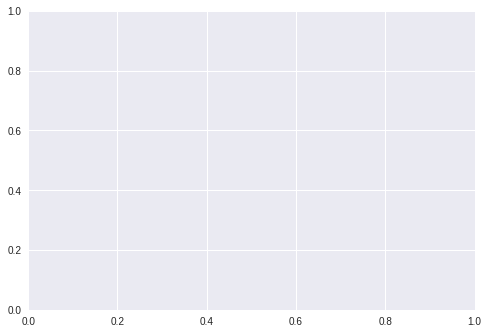

In [22]:
plt.plot(steps, cmmd_accuracy,'-o', label='accuracy')
plt.plot(steps, cmmd_sensitivity,'-o', label='sensitivity')
plt.plot(steps, cmmd_specificity,'-o', label='specificity')
plt.plot(steps, cmmd_f1,'-o', label='f1 score')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0.5,1)
plt.ylabel('CMMD performance')
plt.title('Federated 2 Centers')
plt.savefig('./plots/CMMDmetrics_isolated.png')

In [ ]:
inbreast_accuracy = [inbreast_metrics['GMLD_true_positives'][i] / (inbreast_metrics['GMLD_true_positives'][i] + inbreast_metrics['GMLD_false_negatives'][i]) for i in range(len(inbreast_metrics['GMLD_true_positives']))]
inbreast_sensitivity = [inbreast_metrics['GMLD_true_positives'][i] / (inbreast_metrics['GMLD_true_positives'][i] + inbreast_metrics['GMLD_false_negatives'][i]) for i in range(len(inbreast_metrics['GMLD_true_positives']))]
inbreast_specificity = [inbreast_metrics['GMLD_true_negatives'][i] / (inbreast_metrics['GMLD_true_negatives'][i] + inbreast_metrics['GMLD_false_positives'][i]) for i in range(len(inbreast_metrics['GMLD_true_negatives']))]
inbreast_f1 = [2 * inbreast_metrics['GMLD_true_positives'][i] / (2 * inbreast_metrics['GMLD_true_positives'][i] + inbreast_metrics['GMLD_false_positives'][i] + inbreast_metrics['GMLD_false_negatives'][i]) for i in range(len(inbreast_metrics['GMLD_true_positives']))]

plt.plot(steps, inbreast_accuracy,'-o', label='accuracy')
plt.plot(steps, inbreast_sensitivity,'-o', label='sensitivity')
plt.plot(steps, inbreast_specificity,'-o', label='specificity')
plt.plot(steps, inbreast_f1,'-o', label='f1')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0.2,1)
plt.ylabel('InBreast performance')
plt.title('Federated 2 Centers')
plt.savefig('./plots/InBREASTmetrics_isolated.png')

# Sanity check Success!